In [1]:
import numpy as np
import networkx as nx
import math
import matplotlib.pyplot as plt
import copy

from scipy.spatial import distance

# Generating island2 graphs

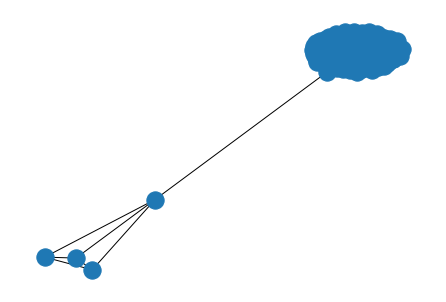

In [6]:
def island(n1, n2, e = 1, e_inter = 1):
    g = nx.complete_graph(n1)
    el = np.array(nx.random_regular_graph(e, n2).edges) + n1
    # print(el)
    g.add_edges_from(el)
    g.add_edges_from([(j, n1 + j) for j in range(e_inter)])
    return g

g = island(96, 4, 3)
nx.draw(g)

In [7]:
f_num = 0

for count in range(0,1):
    for i in range(4,52,2):
        g = island(i, 100 - i, 3, 2)
        # nx.write_edgelist(g, 'isl2_graphs/{:d}.txt'.format(f_num), data=False)
        # print(f_num, g.size())
        f_num+= 1
    print(f_num)


    for i in list(range(5,25)) + list(range(25,51,5)):
        g = island(i, 100 - i, 4, 2)
        # nx.write_edgelist(g, 'isl2_graphs/{:d}.txt'.format(f_num), data=False)
        # print(f_num, g.size())
        f_num+= 1
    print(f_num)


    for i in range(4,52,2):
        g = island(i, 100 - i, 3, 3)
        # nx.write_edgelist(g, 'isl2_graphs/{:d}.txt'.format(f_num), data=False)
        # print(f_num, g.size())
        f_num+= 1
    print(f_num)


    for i in list(range(5,25)) + list(range(25,51,5)):
        g = island(i, 100 - i, 4, 3)
        # nx.write_edgelist(g, 'isl2_graphs/{:d}.txt'.format(f_num), data=False)
        # print(f_num, g.size())
        f_num+= 1
    print(f_num)

24
50
74
100


In [87]:
for i in range(0,100):
    g = nx.read_edgelist('isl2_graphs/{:d}.txt'.format(i), data=False)
    
    print(i, g.degree('0'), g.degree('99'), g.size())

0 4 3 152
1 6 3 158
2 8 3 168
3 10 3 182
4 12 3 200
5 14 3 222
6 16 3 248
7 18 3 278
8 20 3 312
9 22 3 350
10 24 3 392
11 26 3 438
12 28 3 488
13 30 3 542
14 32 3 600
15 34 3 662
16 36 3 728
17 38 3 798
18 40 3 872
19 42 3 950
20 44 3 1032
21 46 3 1118
22 48 3 1208
23 50 3 1302
24 5 4 202
25 6 4 205
26 7 4 209
27 8 4 214
28 9 4 220
29 10 4 227
30 11 4 235
31 12 4 244
32 13 4 254
33 14 4 265
34 15 4 277
35 16 4 290
36 17 4 304
37 18 4 319
38 19 4 335
39 20 4 352
40 21 4 370
41 22 4 389
42 23 4 409
43 24 4 430
44 25 4 452
45 30 4 577
46 35 4 727
47 40 4 902
48 45 4 1102
49 50 4 1327
50 4 3 153
51 6 3 159
52 8 3 169
53 10 3 183
54 12 3 201
55 14 3 223
56 16 3 249
57 18 3 279
58 20 3 313
59 22 3 351
60 24 3 393
61 26 3 439
62 28 3 489
63 30 3 543
64 32 3 601
65 34 3 663
66 36 3 729
67 38 3 799
68 40 3 873
69 42 3 951
70 44 3 1033
71 46 3 1119
72 48 3 1209
73 50 3 1303
74 5 4 203
75 6 4 206
76 7 4 210
77 8 4 215
78 9 4 221
79 10 4 228
80 11 4 236
81 12 4 245
82 13 4 255
83 14 4 266
84 15 4 

# Generating island3 graphs

In [11]:
def sample(eL, g):
    ne = g.size()
    for count in range (ne):
        r1 = np.random.randint(0, ne)
        r2 = np.random.randint(0, ne)
        while r2 == r1:
            r2 = np.random.randint(0, ne)
        e1 = eL[r1]
        e2 = eL[r2]
        if (np.intersect1d(e1, e2).shape[0] == 0 
            and not g.has_edge(e1[0], e2[1])
            and not g.has_edge(e2[0], e1[1]) ):
            
            return True, r1, r2 
            
    if count == ne - 1:
        return False, r1, r2
     
    return True, r1, r2
 
def swap(g, eL, r1, r2):
    e1 = copy.deepcopy(eL[r1])
    e2 = copy.deepcopy(eL[r2])
    
    t1 = np.intersect1d(list(g.neighbors(e1[0])), list(g.neighbors(e1[1])) ).shape[0]
    t1 += np.intersect1d(list(g.neighbors(e2[0])), list(g.neighbors(e2[1])) ).shape[0]
    
    g.remove_edge(e1[0], e1[1])
    g.remove_edge(e2[0], e2[1])
    
    g.add_edge(e1[0], e2[1])
    g.add_edge(e2[0], e1[1])
    
    eL[r1] = (e1[0], e2[1])
    eL[r2] = (e2[0], e1[1])
    
    t2 = np.intersect1d(list(g.neighbors(e1[0])), list(g.neighbors(e2[1])) ).shape[0]
    t2 += np.intersect1d(list(g.neighbors(e2[0])), list(g.neighbors(e1[1])) ).shape[0]
    return (t2 - t1)
    
    
def island(N, g2, e = 2):
    n1 = N - len(g2)
    g = nx.complete_graph(n1)
    el = np.array(g2.edges) + n1
    g.add_edges_from(el)
    g.add_edges_from([(j, n1 + j) for j in range(e)])
    return g

In [10]:
def tune_triangle(n):
    G = nx.random_regular_graph(3,n)
    eL = np.array(G.edges)
    tri = sum(nx.triangles(G).values()) / 3 # avg no of triangles
    old_G = copy.deepcopy(G)

    hist = []
    graphs = [copy.deepcopy(G)]
    hist_t = [tri]
    times = [0]
    T_check = 100
    t_check = 0

    tri_extreme = tri

    print(tri, nx.degree_assortativity_coefficient(G))
    for t in range(100):
        hist += [tri]
        for t2 in range((10 * np.sqrt(G.size())).astype(int)): 
            ### optimization step
            sucess, r1, r2 = sample(eL, G)
            if sucess:
                delta_tri = swap(G, eL, r1, r2)
                tri += delta_tri

                if delta_tri < 0:
                    delta_tri = swap(G, eL, r1, r2)
                    tri += delta_tri

                ### check connectivity
                if T_check == t_check:
                    if nx.is_connected(G):
                        old_G = copy.deepcopy(G)
                        T_check += 1
                    else:
                        T_check //= 2
                        G = copy.deepcopy(old_G)
                        eL = np.array(G.edges)
                        tri = sum(nx.triangles(G).values()) / 3
                    t_check = 0
                else:
                    t_check += 1


            hist_t += [tri]
            times += [t + t2 / 100]

            ### saving graph
            if tri_extreme < tri and nx.is_connected(G):
                tri_extreme = tri
                graphs += [copy.deepcopy(G)]

        if t % 10 == 0:
            print(t, tri, T_check)       
    hist += [tri]
    return graphs
#print(tri, nx.degree_assortativity_coefficient(G))

In [12]:
f_num = 0

graphs = tune_triangle(96)
for i in range(0,40,2):
    
    g = island(100, graphs[i], e = 2)
    # nx.write_edgelist(g, 'isl3_graphs/{:d}.txt'.format(f_num), data=False)
    print(f_num, g.size())
    f_num+= 1
    
graphs = tune_triangle(84)
for i in range(0,40,2):
    
    g = island(100, graphs[i], e = 2)
    # nx.write_edgelist(g, 'isl3_graphs/{:d}.txt'.format(f_num), data=False)
    print(f_num, g.size())
    f_num+= 1
    
graphs = tune_triangle(74)
for i in list(range(0,20)):
    
    g = island(100, graphs[i], e = 2)
    # nx.write_edgelist(g, 'isl3_graphs/{:d}.txt'.format(f_num), data=False)
    print(f_num, g.size())
    f_num+= 1  

1.0 nan
0 6.0 101
10 28.0 112
20 36.0 122
30 38.0 45
40 43.0 49
50 43.0 38
60 43.0 34
70 43.0 23
80 44.0 20
90 45.0 17
0 152
1 152
2 152
3 152
4 152
5 152
6 152
7 152
8 152
9 152
10 152
11 152
12 152
13 152
14 152
15 152
16 152
17 152
18 152
19 152
0.0 nan
0 10.0 101
10 27.0 33
20 33.0 46
30 34.0 24
40 35.0 31
50 35.0 38
60 36.0 26
70 37.0 35
80 38.0 31
90 39.0 20
20 248
21 248
22 248
23 248
24 248
25 248
26 248
27 248
28 248
29 248
30 248
31 248
32 248
33 248
34 248
35 248
36 248
37 248
38 248
39 248
2.0 nan
0 9.0 101
10 26.0 110
20 30.0 63
30 33.0 38
40 33.0 35
50 33.0 48
60 34.0 42
70 34.0 32
80 34.0 32
90 35.0 11
40 438
41 438
42 438
43 438
44 438
45 438
46 438
47 438
48 438
49 438
50 438
51 438
52 438
53 438
54 438
55 438
56 438
57 438
58 438
59 438


In [115]:
with open('isl3_graphs.txt', 'w') as f:
    f.write('file index \t degree 1 \t degree 2 \# of edges \t transitivity \n')
    for i in range(0,800):
        g = nx.read_edgelist('isl2_graphs/{:d}.txt'.format(i), data=False)

        f.write('%d\t%d\t%d\t%d\t%.3f\n'%(i, g.degree('0'), g.degree('99'),
                                        g.size(), nx.transitivity(g)))

'0\t4\t3\t1520.048\n'